# Interactive visualizations



In [1]:
!pip install folium

In [2]:
!pip install pandas

![title](unnamed.png)

In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt2
import folium

In [6]:
Data = pd.read_csv('Historical_Tsunamis2.csv',sep=';', engine='python', encoding='latin-1')
JoinedData= pd.read_csv('Joined_data.csv')
Vis = pd.read_csv('Historical_Tsunami.csv')

C:\Users\imypo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:

Data

,ID,TSEVENT_ID,YEAR,MONTH,DAY,Date,ARR_DAY,ARR_HOUR,ARR_MIN,TRAV_HOURS,...,DAMAGE_TOT,HOUSES_D_4,HOUSES_TOT,INJURIES_T,INJURIES_1,INJURIES_2,MISSING_TO,MISSING__1,MISSING__2,NUM_DEPOSI
0,15817,2439,2004,12,26,26/12/2004,0,0,0,0,...,,0,,0,0,,0,0,,0
1,15818,2439,2004,12,26,26/12/2004,0,0,0,0,...,,0,,0,0,,0,0,,0
2,15820,2439,2004,12,26,26/12/2004,0,0,0,0,...,,0,,0,0,,0,0,,0
3,869,904,1861,2,16,1861/02/16,0,0,0,4,...,,0,,0,0,,0,0,,0
4,866,904,1861,2,16,1861/02/16,0,0,0,0,...,,0,,0,0,,0,0,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26819,25495,5463,2012,8,31,31/08/2012,31,18,41,5,...,,0,,0,0,,0,0,,0
26820,465,549,1788,7,21,1788/07/21,0,0,0,0,...,,0,,0,0,,0,0,,0
26821,25668,5472,2013,1,5,05/01/2013,5,9,20,0,...,,0,,0,0,,0,0,,0
26822,25669,5472,2013,1,5,05/01/2013,5,9,45,0,...,,0,,0,0,,0,0,,0


## Locations ##

In [14]:
Data.columns

Index(['ID', 'TSEVENT_ID', 'YEAR', 'MONTH', 'DAY', 'Date', 'ARR_DAY',
       'ARR_HOUR', 'ARR_MIN', 'TRAV_HOURS', 'TRAV_MINS', 'PERIOD',
       'FIRST_MOTI', 'LATITUDE', 'LONGITUDE', 'LOCATION_N', 'AREA', 'COUNTRY',
       'REGION_COD', 'TYPE_MEASU', 'DAMAGE_MIL', 'DAMAGE_AMO', 'DAMAGE_DES',
       'DEATHS', 'DEATHS_AMO', 'DEATHS_DES', 'INJURIES', 'INJURIES_A',
       'INJURIES_D', 'HOUSES_DES', 'REGION', 'CAUSE', 'EQ_MAG_MFA',
       'EQ_MAGNITU', 'EQ_MAGNI_1', 'EQ_DEPTH', 'TS_MT_ABE', 'TS_MT_II',
       'TS_INTENSI', 'MISSING', 'MISSING_DE', 'MAP_EQ_ID', 'DAMAGE_TOT',
       'HOUSES_D_4', 'HOUSES_TOT', 'INJURIES_T', 'INJURIES_1', 'INJURIES_2',
       'MISSING_TO', 'MISSING__1', 'MISSING__2', 'NUM_DEPOSI'],
      dtype='object')

In [15]:
temp = Data[['LATITUDE','LONGITUDE','DEATHS']]
temp = temp.dropna()

my_zip = zip(temp['LATITUDE'], temp['LONGITUDE'],temp['DEATHS'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(5283, 95247, 0),
 (5355, 95242, 0),
 (5436, 95235, 0),
 (55, 9775, 50),
 (415, 961, 135),
 (5479, 95249, 0),
 (5572, 95325, 0),
 (5584, 95347, 0),
 (5571, 95325, 0),
 (5575, 95326, 0),
 (5593, 95367, 0),
 (555, 95304, 0),
 (5562, 95317, 0),
 (5594, 95335, 0),
 (5588, 95361, 0)]

In [16]:
from folium.plugins import HeatMap
folium_hmap = folium.Map(location=[39.728593,8.952292], 
                         zoom_start=1.5, blur=0,
                         tiles="OpenStreetMap")


In [17]:
folium_hmap.add_child(HeatMap(list_of_my_zip,
                              min_opacity=1,
                              radius = 10,
                              blur = 10))

In [18]:
#BUILDING AN INTERACTIVE SET OF VISUALISATION TOOLS 
#install packages..
!pip install -U -q ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install nbinteract


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [19]:
#conda install -c plotly chart-studio
#conda install -c conda-forge cufflinks-py

In [20]:
#IMPORTS FROM THE PACKAGES
import scipy
import plotly.express as px
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

import os
from IPython.display import Image, display, HTML

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [21]:
pd.set_option('display.max_columns', None)
Data.columns


Index(['ID', 'TSEVENT_ID', 'YEAR', 'MONTH', 'DAY', 'Date', 'ARR_DAY',
       'ARR_HOUR', 'ARR_MIN', 'TRAV_HOURS', 'TRAV_MINS', 'PERIOD',
       'FIRST_MOTI', 'LATITUDE', 'LONGITUDE', 'LOCATION_N', 'AREA', 'COUNTRY',
       'REGION_COD', 'TYPE_MEASU', 'DAMAGE_MIL', 'DAMAGE_AMO', 'DAMAGE_DES',
       'DEATHS', 'DEATHS_AMO', 'DEATHS_DES', 'INJURIES', 'INJURIES_A',
       'INJURIES_D', 'HOUSES_DES', 'REGION', 'CAUSE', 'EQ_MAG_MFA',
       'EQ_MAGNITU', 'EQ_MAGNI_1', 'EQ_DEPTH', 'TS_MT_ABE', 'TS_MT_II',
       'TS_INTENSI', 'MISSING', 'MISSING_DE', 'MAP_EQ_ID', 'DAMAGE_TOT',
       'HOUSES_D_4', 'HOUSES_TOT', 'INJURIES_T', 'INJURIES_1', 'INJURIES_2',
       'MISSING_TO', 'MISSING__1', 'MISSING__2', 'NUM_DEPOSI'],
      dtype='object')

In [22]:
#COLUMN EXPLORER
@interact
def show_recs_more_than(column=list(Data.select_dtypes('number').columns), 
                          x=(1000, 10000, 1)):
    display(HTML(f'<h2>Showing records with more than {x} {column}<h2>'))
    display(Data.loc[Data[column] > x, ['INJURIES', 'MISSING',
       'HOUSES_TOT', 'DEATHS',
      ]])

interactive(children=(Dropdown(description='column', options=('ID', 'TSEVENT_ID', 'YEAR', 'MONTH', 'DAY', 'ARR…

In [23]:
#IMAGE EXPLORER
fdir = 'pics/'

@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir+file))

interactive(children=(Dropdown(description='file', options=('chile.jpg', 'chile2.jpg', 'Japan.jpg', 'tsunami-j…

In [24]:
#CORRELATION EXPLORER - TO CHECK!!!
@interact
def correlations(column1=list(JoinedData.select_dtypes('number').columns), 
                 column2=list(JoinedData.select_dtypes('number').columns)):
    print(f"Correlation: {JoinedData[column1].corr(JoinedData[column2])}")

interactive(children=(Dropdown(description='column1', options=('Unnamed: 0', 'AverageTemperature', 'AverageTem…

In [25]:
#COLUMN DESCRIBE
@interact
def describe(column=list(Data.columns)):
    print(Data[column].describe())

interactive(children=(Dropdown(description='column', options=('ID', 'TSEVENT_ID', 'YEAR', 'MONTH', 'DAY', 'Dat…

In [26]:
#INTERACTIVE PLOTS
@interact
def scatter_plot(x=list(JoinedData.select_dtypes('number').columns), 
                 y=list(JoinedData.select_dtypes('number').columns)[1:]):
    JoinedData.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')

interactive(children=(Dropdown(description='x', options=('Unnamed: 0', 'AverageTemperature', 'AverageTemperatu…

In [27]:
@interact
def scatter_plot(x=list(JoinedData.select_dtypes('number').columns), 
                 y=list(JoinedData.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    JoinedData.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 

             title=f'{y.title()} vs {x.title()}',
            theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('Unnamed: 0', 'AverageTemperature', 'AverageTemperatu…

In [29]:
tsunamis['DEATHS'] = pd.cut(df['DEATHS']), bins=range(0, 35, 5))
tsunamis['DEATHS'] = tsunamis['DEATHS'].astype(str)

tsunamis['INJURIES_2'] = pd.cut(tsunamis['INJURIES_2'], bins=range(1, 50, 5))
tsunamis['INJURIES_2'] = tsunamis['INJURIES_2'].astype(str)

@interact
def scatter_plot(x=list(tsunamis.select_dtypes('number').columns), 
                 y=list(tsunamis.select_dtypes('number').columns)[1:],
                 categories=['DEATHS', 'INJURIES_2', 'type'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             categories=categories, 
             xTitle=x.title(), yTitle=y.title(), 
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

In [ ]:
@interact_manual
def scatter_plot(x=list(tsunamis.select_dtypes('number').columns), 
                 y=list(tsunamis.select_dtypes('number').columns)[1:],
                 categories=['INJURIES_2', 'DEATHS'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    tsunamis.iplot(kind='scatter', x=x, y=y, mode='markers', 
             categories=categories, 
             xTitle=x.title(), yTitle=y.title(), 
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)

In [ ]:
cscales = ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

In [ ]:
sub_tsunamis=Data[['INJURIES_2','DEATHS', 'INJURIES']]

In [ ]:
import plotly.figure_factory as ff

corrs = sub_tsunamis.corr()

@interact_manual
def plot_corrs(colorscale=cscales):
    figure = ff.create_annotated_heatmap(z = corrs.round(2).values, 
                                     x =list(corrs.columns), 
                                     y=list(corrs.index), 
                                     colorscale=colorscale,
                                     annotation_text=corrs.round(2).values)
    iplot(figure)

In [ ]:
Data.head()

In [ ]:
#INTERACTIVE MAP
fig = px.scatter_geo(Vis, lat="LATITUDE", lon="LONGITUDE",
                     color='EQ_MAGNI_1', hover_name='DEATHS', 
                projection="orthographic")
fig
#color="n_cattle", # which column to use to set the color of markers
                     #hover_name="number_affected_last_fmd", # column added to hover information
                     #size="binned_n_cattle", # size of markers

In [ ]:
#we need to define what
fig = px.choropleth(Data, lat="LATITUDE", lon="LONGITUDE",
                     color='DEATHS', hover_name='INJURIES_T',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope=" ",
                           labels={'deaths':'deaths'}
                          )
fig

In [30]:
#conda create -n geo_env
conda activate geo_env
conda config  --env --add channels conda-forge
conda config --env --set channel_priority strict
conda install geopandas

SyntaxError: invalid syntax (<ipython-input-30-366ed9e214f9>, line 2)

In [ ]:
#conda install geopandas
import geopandas

In [31]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.gps_coordinates_lon, df.gps_coordinates_lat))

NameError: name 'geopandas' is not defined

In [32]:
from ipyleaflet import Map, GeoJSON, GeoData, basemaps, Heatmap

ModuleNotFoundError: No module named 'ipyleaflet'

In [33]:
m = Map(basemap=basemaps.OpenTopoMap, center=(-0.3158116,36.0088201), zoom=10)

NameError: name 'Map' is not defined

In [34]:
geo_data = GeoData(geo_dataframe = gdf,
    style={'color': 'black', 'radius':8, 'fillColor': '#3366cc', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    name = 'Release')

m.add_layer(geo_data)

NameError: name 'GeoData' is not defined

##LIVE VISUALIZATION OF THE TSUNAMIS OVER TIME

In [35]:
conda install -c conda-forge basemap-data-hires

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [36]:
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

KeyError: 'PROJ_LIB'

In [ ]:
Data['Year']= Data['Date'].str[6:]

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.text(.8, .3, 'Soumitra', ha='right')
cmap = plt.get_cmap('coolwarm')

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')


START_YEAR = 1700
LAST_YEAR = 2013

points = Data[['Date', 'X', 'Y']][Data['Year']==str(START_YEAR)]

x, y= m(list(points['X']), list(points['Y']))
scat = m.scatter(x, y, s = points['DEATHS']*points['INJURIES']*0.3, marker='o', alpha=0.3, zorder=10, cmap = cmap)
year_text = plt.text(-170, 80, str(START_YEAR),fontsize=15)
plt.title("Tsunamis visualisation (1700 - 2013)")
plt.close()


def update(frame_number):
    current_year = START_YEAR + (frame_number % (LAST_YEAR - START_YEAR + 1))
    year_text.set_text(str(current_year))
    points = Data[['Date', 'Time', 'X', 'Y',]][t_file['Year']==str(current_year)]
    x, y= m(list(points['X']), list(points['Y']))
    color = points['INJURIES_2']*points['DEATHS'];
    scat.set_offsets(np.dstack((x, y)))
    scat.set_sizes(points['DEATHS']*points['INJURIES_2']*0.3)
    
ani = animation.FuncAnimation(fig, update, interval=750, frames=LAST_YEAR - START_YEAR + 1)
ani.save('animation.gif', writer='imagemagick', fps=5)

In [ ]:
import io
import base64

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))


In [40]:
JoinedData.columns


Index(['Unnamed: 0', 'Date', 'AverageTemperature',
       'AverageTemperatureUncertainty', 'COUNTRY', 'YEAR', 'MONTH',
       'CAUSE_MODE', 'EQ_MAGNI_MEAN', 'ID_FIRST', 'DEATHS_MEAN', 'DEATHS_MAX',
       'DEATHS_STD', 'DATE_FIRST', 'Event_Tsunami', 'Event_Earthquake',
       'DATE_STRIN_x', 'LATITUDE_x', 'LONGITUDE_x', 'PENUMBRAL',
       'PARTIAL ECLIPSE', 'DURATION_x', 'EVENT_x', 'DATE_STRIN_y',
       'ECLIPSE_TYPE', 'MAGNITUD', 'LATITUDE_y', 'LONGITUDE_y', 'DURATION_y',
       'EVENT_y', 'DATE_STRIN', 'PLANET_POSITION', 'Lunar_Eclipse',
       'Solar_Eclipse'],
      dtype='object')

In [ ]:
JoinedData.head()

In [52]:
JoinedData['Event_Tsunami'].head()

0    NaN
1    NaN
2    NaN
3    1.0
4    NaN
Name: Event_Tsunami, dtype: float64

In [51]:
JoinedData['Lunar_Eclipse'].head()

0    1
1    0
2    0
3    0
4    0
Name: Lunar_Eclipse, dtype: int64

In [67]:
events=JoinedData[['YEAR','Lunar_Eclipse','Solar_Eclipse','Event_Tsunami']]
events.head()

,YEAR,Lunar_Eclipse,Solar_Eclipse,Event_Tsunami
0,1855,1,1,NaN
1,1855,0,0,NaN
2,1855,0,0,NaN
3,1855,0,0,1.0
4,1855,0,0,NaN


In [68]:
import numpy as np
events = events.fillna(0).replace([np.inf,-np.inf],0)


In [69]:
events.head()

,YEAR,Lunar_Eclipse,Solar_Eclipse,Event_Tsunami
0,1855,1,1,0.0
1,1855,0,0,0.0
2,1855,0,0,0.0
3,1855,0,0,1.0
4,1855,0,0,0.0


In [74]:
events=JoinedData[['YEAR','Lunar_Eclipse','Solar_Eclipse','Event_Tsunami']]
events=pd.melt(events,id_vars=['YEAR'])
events.head();

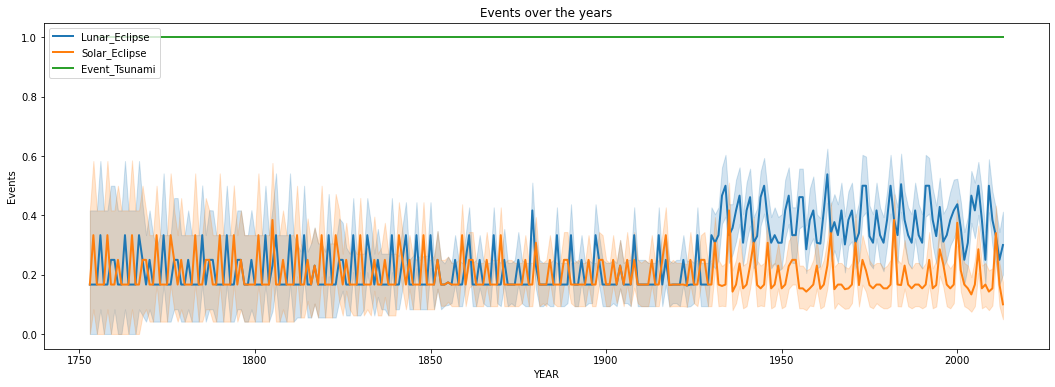

In [73]:
plt.figure(figsize=(18,6))
sns.lineplot(data=events, x='YEAR', y='value',hue='variable',linewidth=2)
plt.title('Events over the years')
plt.legend(['Lunar_Eclipse', 'Solar_Eclipse','Event_Tsunami'],loc='upper left')
plt.ylabel('Events');

<ipython-input-37-7823dc05f13d>:5: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



<ipython-input-37-7823dc05f13d>:8: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



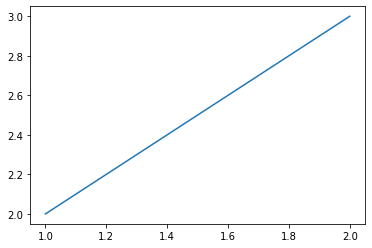

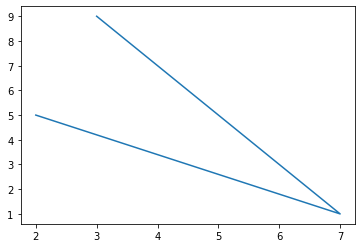

In [37]:
import matplotlib.pyplot as plt
#One way to plot two figure at once
f = plt.figure(1)
plt.plot([1,2],[2,3])
f.show()
g = plt.figure(2)
plt.plot([2,7,3],[5,1,9])
g.show()